## Instalação e download de dados

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM

tf.random.set_seed(42)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Os dados históricos de consumo de água e fraudes são baixados utilizando o comando gdown, uma ferramenta para baixar arquivos do Google Drive.


In [ ]:
!gdown 1iZDFEefN0J2wao1QRIAuT-ukp0coX0Rp
!gdown 1_lY6ydxyDA9-HNrYleq4UrL-JKcKLM7c
!gdown 1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK
!gdown 1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3

!gdown 1-CvuD_GGZlfkdrHDDLBA5xLtKhZjPIWQ # 2019
!gdown 1AfqPM-BDVN0c8m53mX1fLXpMrT8bOAjb # 2020
!gdown 1cnUwErnjNPzItDjYFGc4wU5t8CNXSN0c # 2021
!gdown 1S8f5e9BwkVJm2G_901Sn3P0JnrgQXa0O # 2022
!gdown 1C8m_BeLQN8InNGjzpU_KoY5FXPZpBYRH # 2023
!gdown 1O-pqJ0_PEB0G9ZICiWo8uDDCV9Go1Ry5 # 2024

!gdown 1rEFc2mSTO6ud89Mk5CulzbreachKHgSk # Fraudes

Downloading...
From: https://drive.google.com/uc?id=1iZDFEefN0J2wao1QRIAuT-ukp0coX0Rp
To: /content/DADOS_PROCESSADOS.csv
100% 103M/103M [00:00<00:00, 150MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1_lY6ydxyDA9-HNrYleq4UrL-JKcKLM7c
To: /content/DADOS_PROCESSADOS2.csv
100% 38.5M/38.5M [00:00<00:00, 157MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK
From (redirected): https://drive.google.com/uc?id=1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK&confirm=t&uuid=6790f1fe-2afa-4a9b-a2cf-8db7278d42cc
To: /content/DADOS_PROCESSADOS (1).csv
100% 110M/110M [00:01<00:00, 65.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3
From (redirected): https://drive.google.com/uc?id=1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3&confirm=t&uuid=ce5d30a3-e25d-43c3-9ae4-acfc4f1dc9b2
To: /content/DADOS_PROCESSADOS_COMPLETOS.csv
100% 295M/295M [00:01<00:00, 156MB/s]
Downloading...
From (original): https://drive.googl

In [ ]:
df_2019 = pd.read_csv('/content/CONSUMO_2019.zip', delimiter=';')
df_2019.head(2)

<ipython-input-5-35be3d82a67b>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv('/content/CONSUMO_2019.zip', delimiter=';')


,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2019-12-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,67-RETIDA - GRANDE CLIENTE,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660
1,1,2.0,2019-09-01,19.0,62.0,150.0,32.0,17945983.0,870031.0,0.0,...,01-EM MAOS,-2.0,0.0,NaN,900.0,N,Normal,S,-20.413378,-54.555052


In [ ]:
df_2019.columns

Index(['Unnamed: 0', 'EMP_CODIGO', 'REFERENCIA', 'COD_GRUPO',
       'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'MATRICULA',
       'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL',
       'ECO_PUBLICA', 'ECO_OUTRAS', 'LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA',
       'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'COD_LEITURA_INF_1',
       'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA',
       'DSC_SIMULTANEA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'COD_LEITURA_INT', 'STA_TROCA', 'EXCECAO',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

In [ ]:
df_2019['DAT_LEITURA'] = pd.to_datetime(df_2019['DAT_LEITURA'])

In [ ]:
df_2019['Ano'] = df_2019['DAT_LEITURA'].dt.year
df_2019['Mes'] = df_2019['DAT_LEITURA'].dt.month
df_2019['Dia'] = df_2019['DAT_LEITURA'].dt.day
df_2019['Trimestre'] = df_2019['DAT_LEITURA'].dt.quarter

In [ ]:
consumo_mensal = df_2019.groupby(['Ano', 'Mes'])['CONS_MEDIDO'].sum().reset_index()
consumo_anual = df_2019.groupby('Ano')['CONS_MEDIDO'].sum().reset_index()

In [ ]:
consumo_mensal

,Ano,Mes,CONS_MEDIDO
0,2019,1,5086730.0
1,2019,2,4226680.0
2,2019,3,4158751.0
3,2019,4,4204187.0
4,2019,5,4121365.0
5,2019,6,4129545.0
6,2019,7,4289339.0
7,2019,8,4303188.0
8,2019,9,4631402.0
9,2019,10,4646114.0


In [ ]:
consumo_anual

,Ano,CONS_MEDIDO
0,2019,52656791.0


In [ ]:
consumo_mensal_matricula = df_2019.groupby(['Ano', 'Mes', 'MATRICULA'])['CONS_MEDIDO'].sum().reset_index()
consumo_mensal_matricula

,Ano,Mes,MATRICULA,CONS_MEDIDO
0,2019,1,17000001.0,4.0
1,2019,1,17075331.0,7.0
2,2019,1,17075333.0,0.0
3,2019,1,17075335.0,3.0
4,2019,1,17075336.0,10.0
...,...,...,...,...
4210815,2019,12,17962606.0,10.0
4210816,2019,12,17962645.0,0.0
4210817,2019,12,17962656.0,3.0
4210818,2019,12,17962671.0,0.0


In [ ]:
frequencia_matricula = df_2019.groupby('MATRICULA').size().reset_index(name='Frequencia')
frequencia_matricula

,MATRICULA,Frequencia
0,17000001.0,12
1,17075331.0,12
2,17075333.0,12
3,17075335.0,12
4,17075336.0,12
...,...,...
355818,17962606.0,1
355819,17962645.0,1
355820,17962656.0,1
355821,17962671.0,1


In [ ]:
frequencia_matricula_mes = df_2019.groupby(['Ano', 'Mes', 'MATRICULA']).size().reset_index(name='Frequencia')
frequencia_matricula_mes

,Ano,Mes,MATRICULA,Frequencia
0,2019,1,17000001.0,1
1,2019,1,17075331.0,1
2,2019,1,17075333.0,1
3,2019,1,17075335.0,1
4,2019,1,17075336.0,1
...,...,...,...,...
4210815,2019,12,17962606.0,1
4210816,2019,12,17962645.0,1
4210817,2019,12,17962656.0,1
4210818,2019,12,17962671.0,1


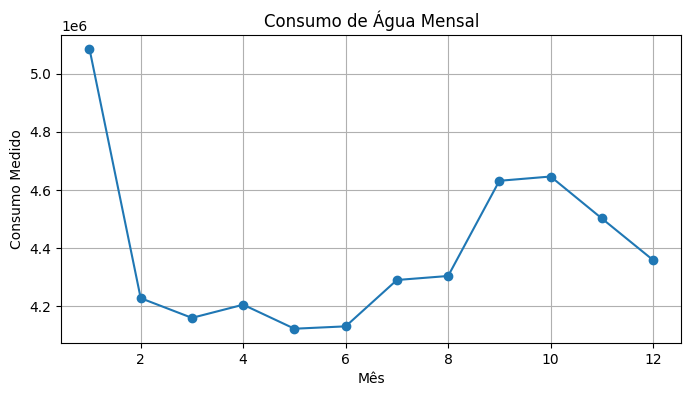

In [ ]:
import matplotlib.pyplot as plt

# Consumo mensal
plt.figure(figsize=(8,4))
plt.plot(consumo_mensal['Mes'], consumo_mensal['CONS_MEDIDO'], marker='o')
plt.title('Consumo de Água Mensal')
plt.xlabel('Mês')
plt.ylabel('Consumo Medido')
plt.grid(True)
plt.show()

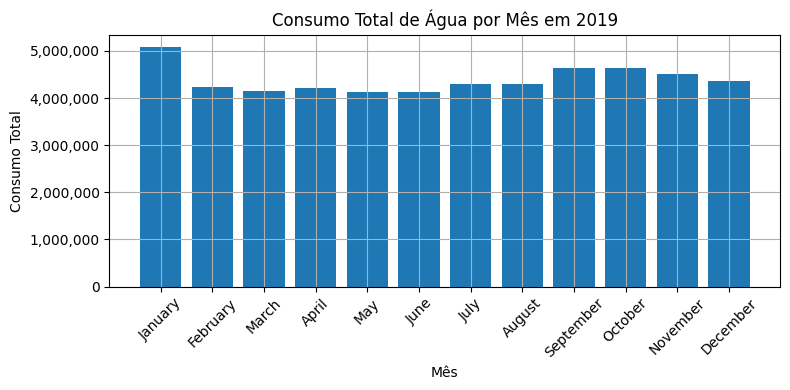

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

consumo_por_mes = df_2019.groupby(df_2019['DAT_LEITURA'].dt.strftime('%B'))['CONS_MEDIDO'].sum().reset_index()

meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
consumo_por_mes['DAT_LEITURA'] = pd.Categorical(consumo_por_mes['DAT_LEITURA'], categories=meses_ordenados, ordered=True)
consumo_por_mes = consumo_por_mes.sort_values('DAT_LEITURA')

plt.figure(figsize=(8,4))
plt.bar(consumo_por_mes['DAT_LEITURA'], consumo_por_mes['CONS_MEDIDO'])

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.title('Consumo Total de Água por Mês em 2019')
plt.xlabel('Mês')
plt.ylabel('Consumo Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

consumo_por_mes = df_2019.groupby(df_2019['DAT_LEITURA'].dt.strftime('%B'))['CONS_MEDIDO'].sum().reset_index()

meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
consumo_por_mes['DAT_LEITURA'] = pd.Categorical(consumo_por_mes['DAT_LEITURA'], categories=meses_ordenados, ordered=True)
consumo_por_mes = consumo_por_mes.sort_values('DAT_LEITURA')

fig = px.bar(consumo_por_mes, x='DAT_LEITURA', y='CONS_MEDIDO',
             labels={'DAT_LEITURA': 'Mês', 'CONS_MEDIDO': 'Consumo Total'},
             title='Consumo Total de Água por Mês em 2019')

fig.update_traces(marker_color='blue')

fig.update_layout(yaxis_tickformat=',',
                  width=1000,
                  height=600)

fig.show()

In [ ]:
from scipy import stats

df_2019['z_score'] = stats.zscore(df_2019['CONS_MEDIDO'])
outliers = df_2019[df_2019['z_score'].abs() > 3]
outliers

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE,Ano,Mes,Dia,Trimestre,z_score
0,0,2.0,2019-12-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,N,Isento Agua e Esgoto,S,-20.477470,-54.761660,2019,12,26,4,10.621032
2,2,2.0,2019-02-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,N,Isento Agua e Esgoto,S,-20.477470,-54.761660,2019,2,26,1,5.349597
37,37,2.0,2019-05-01,8.0,1.0,122.0,1.0,17941939.0,838273.0,0.0,...,N,Normal,S,-20.460470,-54.603657,2019,5,13,2,3.109868
71,71,2.0,2019-09-01,19.0,11.0,100.0,4.0,17860305.0,499969.0,44.0,...,N,Normal,S,-20.450989,-54.578208,2019,9,28,3,6.207151
147,147,2.0,2019-05-01,12.0,14.0,291.0,8.0,17847991.0,453384.0,228.0,...,N,Normal,S,-20.441621,-54.618333,2019,5,20,2,15.927777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208523,4208523,2.0,2019-04-01,99.0,5.0,84.0,5.0,17710003.0,230454.0,78.0,...,N,Normal,S,-20.451996,-54.609842,2019,4,30,2,3.498290
4208525,4208525,2.0,2019-04-01,99.0,5.0,110.0,5.0,17711632.0,231655.0,48.0,...,N,Normal,S,-20.451351,-54.611481,2019,4,30,2,3.352001
4208526,4208526,2.0,2019-04-01,99.0,5.0,60.0,5.0,17734041.0,251711.0,36.0,...,N,Normal,S,-20.445808,-54.608904,2019,4,30,2,4.073355
4209115,4209115,2.0,2019-04-01,99.0,57.0,210.0,18.0,17708922.0,229575.0,0.0,...,N,Normal,S,-20.460338,-54.526573,2019,4,30,2,37.507869


In [ ]:
import pandas as pd
from scipy import stats

df_2019['DAT_LEITURA'] = pd.to_datetime(df_2019['DAT_LEITURA'])

df_2019['month'] = df_2019['DAT_LEITURA'].dt.to_period('M')

monthly_stats = df_2019.groupby('month')['CONS_MEDIDO'].agg(['mean', 'std']).reset_index()
monthly_stats.rename(columns={'mean': 'mean_cons', 'std': 'std_cons'}, inplace=True)

df_2019 = df_2019.merge(monthly_stats, how='left', left_on='month', right_on='month')

df_2019['z_score'] = (df_2019['CONS_MEDIDO'] - df_2019['mean_cons']) / df_2019['std_cons']

outliers = df_2019[df_2019['z_score'].abs() > 3]
outliers

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,COD_LATITUDE,COD_LONGITUDE,Ano,Mes,Dia,Trimestre,z_score,month,mean_cons,std_cons
0,0,2.0,2019-12-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,-20.477470,-54.761660,2019,12,26,4,20.529680,2019-12,12.280046,102.569543
2,2,2.0,2019-02-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,-20.477470,-54.761660,2019,2,26,1,9.446450,2019-02,12.128033,112.303771
37,37,2.0,2019-05-01,8.0,1.0,122.0,1.0,17941939.0,838273.0,0.0,...,-20.460470,-54.603657,2019,5,13,2,5.887258,2019-05,11.797339,104.837031
71,71,2.0,2019-09-01,19.0,11.0,100.0,4.0,17860305.0,499969.0,44.0,...,-20.450989,-54.578208,2019,9,28,3,11.748063,2019-09,13.128338,104.687188
147,147,2.0,2019-05-01,12.0,14.0,291.0,8.0,17847991.0,453384.0,228.0,...,-20.441621,-54.618333,2019,5,20,2,30.124877,2019-05,11.797339,104.837031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209020,4209020,2.0,2019-04-01,9.0,83.0,373.0,44.0,17454001.0,197301.0,0.0,...,-20.532548,-54.655654,2019,4,15,2,3.936185,2019-04,12.047727,110.755018
4209058,4209058,2.0,2019-04-01,17.0,94.0,298.0,42.0,17836439.0,368723.0,0.0,...,-20.551633,-54.606290,2019,4,26,2,3.042321,2019-04,12.047727,110.755018
4209060,4209060,2.0,2019-04-01,99.0,26.0,58.0,17.0,17615155.0,221133.0,0.0,...,-20.439636,-54.561296,2019,4,30,2,3.457652,2019-04,12.047727,110.755018
4209115,4209115,2.0,2019-04-01,99.0,57.0,210.0,18.0,17708922.0,229575.0,0.0,...,-20.460338,-54.526573,2019,4,30,2,67.138739,2019-04,12.047727,110.755018


In [ ]:
df_2019

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2019-12-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,67-RETIDA - GRANDE CLIENTE,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660
1,1,2.0,2019-09-01,19.0,62.0,150.0,32.0,17945983.0,870031.0,0.0,...,01-EM MAOS,-2.0,0.0,NaN,900.0,N,Normal,S,-20.413378,-54.555052
2,2,2.0,2019-02-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,67-RETIDA - GRANDE CLIENTE,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660
3,3,2.0,2019-08-01,15.0,78.0,172.0,27.0,17490028.0,645532.0,1.0,...,02-CAIXA CORREIO,0.0,0.0,NaN,900.0,N,Normal,S,-20.507476,-54.663976
4,4,2.0,2019-07-01,5.0,5.0,180.0,4.0,17129923.0,496163.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,905.0,N,Normal,S,-20.453935,-54.619645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210815,4210815,2.0,2019-11-01,12.0,8.0,271.0,4.0,17108333.0,1049413.0,1.0,...,02-CAIXA CORREIO,10.0,10.0,MEDIA,107.0,N,Normal,N,-20.469254,-54.597804
4210816,4210816,2.0,2019-11-01,9.0,92.0,330.0,47.0,17171758.0,886058.0,1.0,...,04-FIXADA AO PORTAO,10.0,10.0,MEDIA,107.0,N,Normal,N,-20.550235,-54.573375
4210817,4210817,2.0,2019-11-01,11.0,38.0,416.0,20.0,17779236.0,262062.0,1.0,...,02-CAIXA CORREIO,10.0,10.0,MEDIA,104.0,N,Normal,N,-20.438123,-54.666558
4210818,4210818,2.0,2019-04-01,16.0,3.0,76.0,1.0,17338320.0,167787.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,900.0,N,Normal,S,-20.456004,-54.596311


In [ ]:
df_2020 = pd.read_csv('/content/CONSUMO_2020.zip', delimiter=';')
df_2020.head(2)

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2020-05-01,6.0,25.0,136.0,20.0,17878422.0,1000092.0,0.0,...,69-RETIDA - CONSOLIDADO,0.0,0.0,NaN,900.0,N,Normal,S,-20.462311,-54.563373
1,1,2.0,2020-10-01,9.0,1.0,68.0,1.0,17843197.0,399664.0,0.0,...,62-RETIDA - NÃO IMPRESSA,0.0,0.0,MEDIA,107.0,N,Normal,N,-20.460588,-54.610802


In [ ]:
df_2020.columns

Index(['Unnamed: 0', 'EMP_CODIGO', 'REFERENCIA', 'COD_GRUPO',
       'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'MATRICULA',
       'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL',
       'ECO_PUBLICA', 'ECO_OUTRAS', 'LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA',
       'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'COD_LEITURA_INF_1',
       'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA',
       'DSC_SIMULTANEA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'COD_LEITURA_INT', 'STA_TROCA', 'EXCECAO',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

In [ ]:
df_2021 = pd.read_csv('/content/CONSUMO_2021.zip', delimiter=';')
df_2021.head(2)

<ipython-input-7-b1200eba0b76>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv('/content/CONSUMO_2021.zip', delimiter=';')


,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2021-06-01,12.0,55.0,74.0,31.0,17233802.0,813089.0,1.0,...,02-CAIXA CORREIO,0.0,0.0,NaN,900.0,N,Normal,S,-20.474361,-54.552343
1,1,2.0,2021-01-01,21.0,62.0,150.0,54.0,17945983.0,870031.0,0.0,...,01-EM MAOS,0.0,0.0,NaN,908.0,N,Normal,S,-20.413378,-54.555052


In [ ]:
df_2021.columns

Index(['Unnamed: 0', 'EMP_CODIGO', 'REFERENCIA', 'COD_GRUPO',
       'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'MATRICULA',
       'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL',
       'ECO_PUBLICA', 'ECO_OUTRAS', 'LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA',
       'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'COD_LEITURA_INF_1',
       'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA',
       'DSC_SIMULTANEA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'COD_LEITURA_INT', 'STA_TROCA', 'EXCECAO',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

In [ ]:
df_2022 = pd.read_csv('/content/CONSUMO_2022.zip', delimiter=';')
df_2022.head(2)

<ipython-input-8-b7cf9befa12c>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('/content/CONSUMO_2022.zip', delimiter=';')


,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2022-02-01,6.0,42.0,156.0,27.0,17224682.0,123755.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,MEDIA,107.0,N,Normal,N,-20.493049,-54.669201
1,1,2.0,2022-05-01,50.0,1.0,56.0,1.0,17386534.0,183125.0,1.0,...,02-CAIXA CORREIO,0.0,0.0,NaN,900.0,N,Normal,S,-20.986346,-54.508939


In [ ]:
df_2022.columns

Index(['Unnamed: 0', 'EMP_CODIGO', 'REFERENCIA', 'COD_GRUPO',
       'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'MATRICULA',
       'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL',
       'ECO_PUBLICA', 'ECO_OUTRAS', 'LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA',
       'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'COD_LEITURA_INF_1',
       'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA',
       'DSC_SIMULTANEA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'COD_LEITURA_INT', 'STA_TROCA', 'EXCECAO',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

In [ ]:
df_2023 = pd.read_csv('/content/CONSUMO_2023.zip', delimiter=';')
df_2023.head(2)

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2023-01-01,8.0,1.0,126.0,1.0,17089633.0,309250.0,0.0,...,04-FIXADA AO PORTAO,0.0,0.0,NaN,900.0,N,Normal,S,-20.459359,-54.604419
1,1,2.0,2023-03-01,50.0,1.0,22.0,1.0,17250292.0,134314.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,900.0,N,Normal,S,-20.978884,-54.505892


In [ ]:
df_2023.columns

Index(['Unnamed: 0', 'EMP_CODIGO', 'REFERENCIA', 'COD_GRUPO',
       'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'MATRICULA',
       'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL',
       'ECO_PUBLICA', 'ECO_OUTRAS', 'LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA',
       'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'COD_LEITURA_INF_1',
       'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA',
       'DSC_SIMULTANEA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'COD_LEITURA_INT', 'STA_TROCA', 'EXCECAO',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

In [ ]:
df_2024 = pd.read_csv('/content/CONSUMO_2024.zip', delimiter=';')
df_2024.head(2)

<ipython-input-10-b46e3ac54d39>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv('/content/CONSUMO_2024.zip', delimiter=';')


,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2024-05-01,4.0,17.0,16.0,11.0,17188010.0,581756.0,0.0,...,63-RETIDA - FATURA ELETRONICA,-21.0,0.0,NaN,901.0,N,Normal,S,-20.460904,-54.634308
1,1,2.0,2024-06-01,4.0,87.0,60.0,38.0,17424465.0,188809.0,1.0,...,00-NAO ENTREGUE,0.0,0.0,NaN,900.0,N,Normal,S,-20.520205,-54.602621


In [ ]:
df_2024.columns

Index(['Unnamed: 0', 'EMP_CODIGO', 'REFERENCIA', 'COD_GRUPO',
       'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'MATRICULA',
       'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL',
       'ECO_PUBLICA', 'ECO_OUTRAS', 'LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA',
       'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'COD_LEITURA_INF_1',
       'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA',
       'DSC_SIMULTANEA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'COD_LEITURA_INT', 'STA_TROCA', 'EXCECAO',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

In [ ]:
df_fraudes = pd.read_csv('/content/FRAUDES_HIST.zip', delimiter=';')
df_fraudes.head(2)

,Unnamed: 0,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,...,DS_SERVICO_SOLICITADO,FL_EXECUTADO,NM_TIPO_EXECUCAO,DT_LIMITE_EXECUCAO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO,FL_PROGRAMACAO_AUTOMATICA,NMCOMUNIDADE,AREAATUACAO
0,0,Desdobro,2023.0,230101031796,11/23,17229588,1031796,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1.0,activityCompleted,2024-03-11 23:59:59,2023-11-06 00:00:00,2023-11-06 11:07:02,HD interno,NaN,NaN,NaN
1,1,Desdobro,2024.0,240100141765,02/24,17804014,141765,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,VISTORIA DE IRREGULARIDADE,1.0,activityCompleted,2024-06-24 23:59:59,2024-02-13 00:00:00,2024-02-13 15:59:01,421,NaN,NaN,NaN


In [ ]:
def definirFraudador(df, nome_coluna):

    df[nome_coluna] = 1

    return df

In [ ]:
df_fraudes = definirFraudador(df_fraudes, 'FRAUDADOR')
df_fraudes

,Unnamed: 0,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,...,FL_EXECUTADO,NM_TIPO_EXECUCAO,DT_LIMITE_EXECUCAO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO,FL_PROGRAMACAO_AUTOMATICA,NMCOMUNIDADE,AREAATUACAO,FRAUDADOR
0,0,Desdobro,2023.0,230101031796,11/23,17229588,1031796,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,1.0,activityCompleted,2024-03-11 23:59:59,2023-11-06 00:00:00,2023-11-06 11:07:02,HD interno,NaN,NaN,NaN,1
1,1,Desdobro,2024.0,240100141765,02/24,17804014,141765,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,1.0,activityCompleted,2024-06-24 23:59:59,2024-02-13 00:00:00,2024-02-13 15:59:01,421,NaN,NaN,NaN,1
2,2,Desdobro,2024.0,240100021314,01/24,17234771,21314,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,1.0,activityCompleted,2024-04-22 23:59:59,2024-01-08 00:00:00,2024-01-08 15:45:46,413,NaN,NaN,NaN,1
3,3,Desdobro,2023.0,230101217142,12/23,17837656,1217142,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,1.0,activityCompleted,2024-05-08 23:59:59,2024-01-03 00:00:00,2024-01-03 15:40:12,No local ligação cortada e violado no cavalete...,NaN,NaN,NaN,1
4,4,Desdobro,2024.0,240100077627,01/24,17722316,77627,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,1.0,activityCompleted,2024-05-31 23:59:59,2024-01-24 00:00:00,2024-01-24 08:53:18,421,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225992,225992,OsOnline,2020.0,200100034631,01/20,17865556,100034631,2039,IRREGULARIDADE IDENTIFICADA,4.0,...,1.0,Executado,2020-02-03 23:59:59,2020-01-14 14:00:07,2020-01-14 14:42:56,405 violada cavalete,1.0,NaN,NaN,1
225993,225993,OsOnline,2022.0,220100065876,01/22,17511826,100065876,110013,IRREGULARIDADE IDENTIFICADA,4.0,...,1.0,Executado,2022-02-04 23:59:59,2022-01-21 10:38:13,2022-01-21 10:38:23,421 ligação cortada com hidrometro interno em ...,0.0,NaN,NaN,1
225994,225994,OsOnline,2022.0,220100450752,05/22,17920302,100450752,110013,IRREGULARIDADE IDENTIFICADA,4.0,...,1.0,Executado,2022-10-15 23:59:59,2022-05-10 16:51:43,2022-05-10 16:52:03,"Violada no ramal,passando agua pelo HD.. .",0.0,NaN,NaN,1
225995,225995,OsOnline,2022.0,220101353952,12/22,17801545,101353952,110013,IRREGULARIDADE IDENTIFICADA,4.0,...,1.0,Executado,2023-01-24 23:59:59,2022-12-30 11:52:39,2022-12-30 12:22:23,Violada cavalete...parece estar desabitado,0.0,NaN,NaN,1


In [ ]:
df_fraudes = df_fraudes[['MATRICULA', 'FRAUDADOR']]

In [ ]:
df_fraudes.columns

Index(['MATRICULA', 'FRAUDADOR'], dtype='object')

In [ ]:
import pandas as pd

print(df_2019.columns == df_2020.columns)
print(df_2020.columns == df_2021.columns)
print(df_2021.columns == df_2022.columns)
print(df_2022.columns == df_2023.columns)
print(df_2023.columns == df_2024.columns)

df_total = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

print(df_total.head())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True 

In [ ]:
df_total

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2019-12-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,67-RETIDA - GRANDE CLIENTE,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660
1,1,2.0,2019-09-01,19.0,62.0,150.0,32.0,17945983.0,870031.0,0.0,...,01-EM MAOS,-2.0,0.0,NaN,900.0,N,Normal,S,-20.413378,-54.555052
2,2,2.0,2019-02-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,67-RETIDA - GRANDE CLIENTE,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660
3,3,2.0,2019-08-01,15.0,78.0,172.0,27.0,17490028.0,645532.0,1.0,...,02-CAIXA CORREIO,0.0,0.0,NaN,900.0,N,Normal,S,-20.507476,-54.663976
4,4,2.0,2019-07-01,5.0,5.0,180.0,4.0,17129923.0,496163.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,905.0,N,Normal,S,-20.453935,-54.619645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24774814,2805903,2.0,2024-02-01,6.0,5.0,176.0,4.0,17076973.0,1104570.0,0.0,...,63-RETIDA - FATURA ELETRONICA,1.0,0.0,MEDIA,107.0,N,Normal,S,-20.455827,-54.620090
24774815,2805904,2.0,2024-02-01,13.0,2.0,38.0,1.0,17811395.0,762746.0,0.0,...,04-FIXADA AO PORTAO,2.0,0.0,MEDIA,107.0,N,Normal,S,-20.465784,-54.615295
24774816,2805905,2.0,2024-02-01,18.0,15.0,362.0,27.0,17369318.0,1221182.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,905.0,N,Normal,S,-20.460078,-54.628201
24774817,2805906,2.0,2024-02-01,21.0,44.0,28.0,23.0,17116226.0,104214.0,0.0,...,04-FIXADA AO PORTAO,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.487992,-54.635651


In [ ]:
df_total.columns

Index(['Unnamed: 0', 'EMP_CODIGO', 'REFERENCIA', 'COD_GRUPO',
       'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'MATRICULA',
       'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL',
       'ECO_PUBLICA', 'ECO_OUTRAS', 'LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA',
       'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'COD_LEITURA_INF_1',
       'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA',
       'DSC_SIMULTANEA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'COD_LEITURA_INT', 'STA_TROCA', 'EXCECAO',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

In [ ]:
df_fraudes

,MATRICULA,FRAUDADOR
0,17229588,1
1,17804014,1
2,17234771,1
3,17837656,1
4,17722316,1
...,...,...
225992,17865556,1
225993,17511826,1
225994,17920302,1
225995,17801545,1


In [ ]:
# Fazendo o merge com base na coluna 'MATRICULA'
df = pd.merge(df_total, df_fraudes, on='MATRICULA', how='left')

print(df.head())

   Unnamed: 0  EMP_CODIGO  REFERENCIA  COD_GRUPO  COD_SETOR_COMERCIAL  \
0           0         2.0  2019-12-01       18.0                 75.0   
1           1         2.0  2019-09-01       19.0                 62.0   
2           2         2.0  2019-02-01       18.0                 75.0   
3           3         2.0  2019-08-01       15.0                 78.0   
4           4         2.0  2019-07-01        5.0                  5.0   

   NUM_QUADRA  COD_ROTA_LEITURA   MATRICULA  SEQ_RESPONSAVEL  ECO_RESIDENCIAL  \
0        80.0              31.0  17857536.0         453585.0              0.0   
1       150.0              32.0  17945983.0         870031.0              0.0   
2        80.0              31.0  17857536.0         453585.0              0.0   
3       172.0              27.0  17490028.0         645532.0              1.0   
4       180.0               4.0  17129923.0         496163.0              0.0   

   ...  VOLUME_ESTIMADO  VOLUME_ESTIMADO_ACUM  FATURADO_MEDIA  \
0  ...   

In [ ]:
df

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE,FRAUDADOR
0,0,2.0,2019-12-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660,NaN
1,1,2.0,2019-09-01,19.0,62.0,150.0,32.0,17945983.0,870031.0,0.0,...,-2.0,0.0,NaN,900.0,N,Normal,S,-20.413378,-54.555052,NaN
2,2,2.0,2019-02-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660,NaN
3,3,2.0,2019-08-01,15.0,78.0,172.0,27.0,17490028.0,645532.0,1.0,...,0.0,0.0,NaN,900.0,N,Normal,S,-20.507476,-54.663976,NaN
4,4,2.0,2019-07-01,5.0,5.0,180.0,4.0,17129923.0,496163.0,0.0,...,0.0,0.0,NaN,905.0,N,Normal,S,-20.453935,-54.619645,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31527362,2805906,2.0,2024-02-01,21.0,44.0,28.0,23.0,17116226.0,104214.0,0.0,...,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.487992,-54.635651,1.0
31527363,2805906,2.0,2024-02-01,21.0,44.0,28.0,23.0,17116226.0,104214.0,0.0,...,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.487992,-54.635651,1.0
31527364,2805906,2.0,2024-02-01,21.0,44.0,28.0,23.0,17116226.0,104214.0,0.0,...,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.487992,-54.635651,1.0
31527365,2805907,2.0,2024-02-01,6.0,20.0,358.0,17.0,17363940.0,177570.0,0.0,...,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.495869,-54.627031,1.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'EMP_CODIGO', 'REFERENCIA', 'COD_GRUPO',
       'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'MATRICULA',
       'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL',
       'ECO_PUBLICA', 'ECO_OUTRAS', 'LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA',
       'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'COD_LEITURA_INF_1',
       'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA',
       'DSC_SIMULTANEA', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM',
       'FATURADO_MEDIA', 'COD_LEITURA_INT', 'STA_TROCA', 'EXCECAO',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE', 'FRAUDADOR'],
      dtype='object')

In [ ]:
# Substituir NaN por 0 na coluna 'FRAUDADOR' e converter os valores para inteiro
df['FRAUDADOR'].fillna(0, inplace=True)
df['FRAUDADOR'] = df['FRAUDADOR'].astype(int)

In [ ]:
df

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE,FRAUDADOR
0,0,2.0,2019-12-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660,0
1,1,2.0,2019-09-01,19.0,62.0,150.0,32.0,17945983.0,870031.0,0.0,...,-2.0,0.0,NaN,900.0,N,Normal,S,-20.413378,-54.555052,0
2,2,2.0,2019-02-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660,0
3,3,2.0,2019-08-01,15.0,78.0,172.0,27.0,17490028.0,645532.0,1.0,...,0.0,0.0,NaN,900.0,N,Normal,S,-20.507476,-54.663976,0
4,4,2.0,2019-07-01,5.0,5.0,180.0,4.0,17129923.0,496163.0,0.0,...,0.0,0.0,NaN,905.0,N,Normal,S,-20.453935,-54.619645,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31527362,2805906,2.0,2024-02-01,21.0,44.0,28.0,23.0,17116226.0,104214.0,0.0,...,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.487992,-54.635651,1
31527363,2805906,2.0,2024-02-01,21.0,44.0,28.0,23.0,17116226.0,104214.0,0.0,...,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.487992,-54.635651,1
31527364,2805906,2.0,2024-02-01,21.0,44.0,28.0,23.0,17116226.0,104214.0,0.0,...,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.487992,-54.635651,1
31527365,2805907,2.0,2024-02-01,6.0,20.0,358.0,17.0,17363940.0,177570.0,0.0,...,0.0,0.0,MEDIA,107.0,N,Normal,S,-20.495869,-54.627031,1


In [ ]:
colunas_desejadas = ['MATRICULA', 'DAT_LEITURA', 'CONS_MEDIDO', 'CATEGORIA', 'COD_LATITUDE', 'COD_LONGITUDE', 'FRAUDADOR']

df = df[colunas_desejadas]

df

,MATRICULA,DAT_LEITURA,CONS_MEDIDO,CATEGORIA,COD_LATITUDE,COD_LONGITUDE,FRAUDADOR
0,17857536.0,2019-12-26,2118.0,PUBLICA,-20.477470,-54.761660,0
1,17945983.0,2019-09-26,218.0,COMERCIAL,-20.413378,-54.555052,0
2,17857536.0,2019-02-26,1073.0,PUBLICA,-20.477470,-54.761660,0
3,17490028.0,2019-08-19,9.0,RESIDENCIAL,-20.507476,-54.663976,0
4,17129923.0,2019-07-08,0.0,PUBLICA,-20.453935,-54.619645,0
...,...,...,...,...,...,...,...
31527362,17116226.0,2024-02-24,0.0,COMERCIAL,-20.487992,-54.635651,1
31527363,17116226.0,2024-02-24,0.0,COMERCIAL,-20.487992,-54.635651,1
31527364,17116226.0,2024-02-24,0.0,COMERCIAL,-20.487992,-54.635651,1
31527365,17363940.0,2024-02-07,0.0,COMERCIAL,-20.495869,-54.627031,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527367 entries, 0 to 31527366
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   MATRICULA      float64
 1   DAT_LEITURA    object 
 2   CONS_MEDIDO    float64
 3   CATEGORIA      object 
 4   COD_LATITUDE   float64
 5   COD_LONGITUDE  float64
 6   FRAUDADOR      int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ GB


In [ ]:
import pandas as pd

mapping = {
    'RESIDENCIAL': 0,
    'COMERCIAL': 1,
    'PUBLICA': 2,
    'INDUSTRIAL': 3
}

df['CATEGORIA'] = df['CATEGORIA'].map(mapping)

df

<ipython-input-27-fdd262ec4c44>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CATEGORIA'] = df['CATEGORIA'].map(mapping)


,MATRICULA,DAT_LEITURA,CONS_MEDIDO,CATEGORIA,COD_LATITUDE,COD_LONGITUDE,FRAUDADOR
0,17857536.0,2019-12-26,2118.0,2,-20.477470,-54.761660,0
1,17945983.0,2019-09-26,218.0,1,-20.413378,-54.555052,0
2,17857536.0,2019-02-26,1073.0,2,-20.477470,-54.761660,0
3,17490028.0,2019-08-19,9.0,0,-20.507476,-54.663976,0
4,17129923.0,2019-07-08,0.0,2,-20.453935,-54.619645,0
...,...,...,...,...,...,...,...
31527362,17116226.0,2024-02-24,0.0,1,-20.487992,-54.635651,1
31527363,17116226.0,2024-02-24,0.0,1,-20.487992,-54.635651,1
31527364,17116226.0,2024-02-24,0.0,1,-20.487992,-54.635651,1
31527365,17363940.0,2024-02-07,0.0,1,-20.495869,-54.627031,1


In [ ]:
df['DAT_LEITURA'] = pd.to_datetime(df['DAT_LEITURA'], errors='coerce')

# Exibir o DataFrame atualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527367 entries, 0 to 31527366
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   MATRICULA      float64       
 1   DAT_LEITURA    datetime64[ns]
 2   CONS_MEDIDO    float64       
 3   CATEGORIA      int64         
 4   COD_LATITUDE   float64       
 5   COD_LONGITUDE  float64       
 6   FRAUDADOR      int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.6 GB


<ipython-input-28-0b272772e2a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAT_LEITURA'] = pd.to_datetime(df['DAT_LEITURA'], errors='coerce')


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['CONS_MEDIDO'] = scaler.fit_transform(df[['CONS_MEDIDO']])

<ipython-input-29-e620751a6d91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CONS_MEDIDO'] = scaler.fit_transform(df[['CONS_MEDIDO']])


In [ ]:
df['ANO'] = df['DAT_LEITURA'].dt.year
df['MES'] = df['DAT_LEITURA'].dt.month
df['DIA_SEMANA'] = df['DAT_LEITURA'].dt.dayofweek

<ipython-input-30-67c3fec17747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ANO'] = df['DAT_LEITURA'].dt.year
<ipython-input-30-67c3fec17747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MES'] = df['DAT_LEITURA'].dt.month
<ipython-input-30-67c3fec17747>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
# Separar características e rótulo
X = df[['DAT_LEITURA', 'CONS_MEDIDO', 'CATEGORIA', 'COD_LATITUDE', 'COD_LONGITUDE']]
y = df['FRAUDADOR']

# Converta DAT_LEITURA para o formato datetime e extraia características temporais se necessário
X['DAT_LEITURA'] = pd.to_datetime(X['DAT_LEITURA'])
X['ANO'] = X['DAT_LEITURA'].dt.year
X['MES'] = X['DAT_LEITURA'].dt.month
X['DIA'] = X['DAT_LEITURA'].dt.day
X = X.drop(columns=['DAT_LEITURA'])

<ipython-input-32-b5115fdf84e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DAT_LEITURA'] = pd.to_datetime(X['DAT_LEITURA'])
<ipython-input-32-b5115fdf84e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ANO'] = X['DAT_LEITURA'].dt.year
<ipython-input-32-b5115fdf84e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
from sklearn.utils import resample

# Combine X_scaled e y em um DataFrame
df_balanced = pd.concat([pd.DataFrame(X_scaled), y.reset_index(drop=True)], axis=1)
df_balanced.columns = list(range(X_scaled.shape[1])) + ['FRAUDADOR']

# Separar classes majoritária e minoritária
df_majority = df_balanced[df_balanced['FRAUDADOR'] == 0]
df_minority = df_balanced[df_balanced['FRAUDADOR'] == 1]

# Under-sample majoritária
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine os DataFrames balanceados
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separar características e rótulo
X_balanced = df_balanced.drop(columns=['FRAUDADOR'])
y_balanced = df_balanced['FRAUDADOR']

In [ ]:
# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
# Reformular os dados para LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Definindo o modelo LSTM
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(16, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compilando o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Criando o modelo
model = create_lstm_model()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Treinamento do modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop, reduce_lr])

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Exibindo resultados do treinamento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Prevendo com o modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Relatório de classificação
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/100
236875/745093 [========>.....................] - ETA: 56:00 - loss: nan - accuracy: 0.4999